In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from Colors import getDistinctColors

In [2]:
def plot_points(ps, size=(15, 8)):
    plot_ps = None
    colors = None
    possible_colors = getDistinctColors(len(ps))
    colors = []
    for c, p in enumerate(ps):
        if plot_ps is None:
            plot_ps = p
        else:
            plot_ps = np.concatenate((plot_ps, p))
        for _ in range(len(p)):
            colors.append(c)
    
    print(colors)
    xs = plot_ps[:,0]
    ys = plot_ps[:,1]
    zs = plot_ps[:,2]
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, c=colors, marker='x')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

Pointclouds

In [4]:
p1 = np.array([[0, 0, 0],
               [1, 0, 0],
               [0, 1, 0],
               [0, 0, 1],
               [1, 1, 1]])

p2 = p1 + 2

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


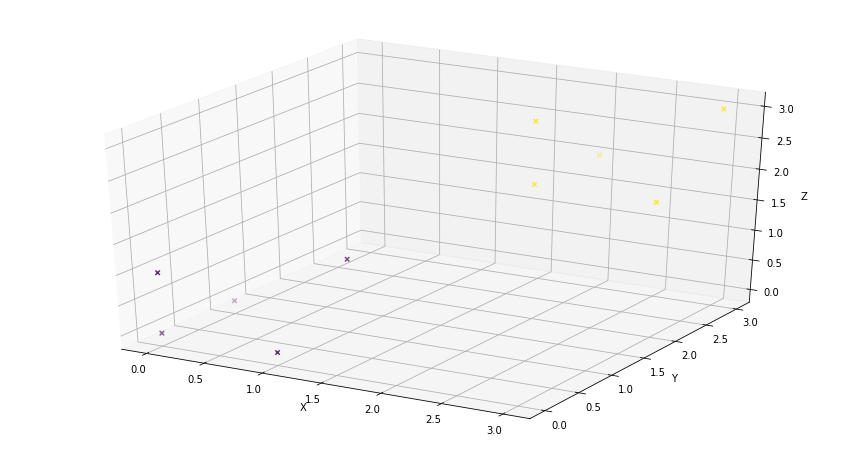

In [7]:
plot_points([p1, p2], size=(15, 8))

We have a target pointcloud $\textbf{X}$, and a source pointcloud $\textbf{Y}$.<br>
The idea is then to estimate a translation and rotation so that, by some error meassure, the error $E$ between $\textbf{X}$ and $\textbf{Y}$ is as small as possible.

Definitions: <br>
$\textbf{X}$ is a 3D pointset, so that $\textbf{X} = \{\textbf{x}_i\}, i = 1,\ldots,M$ <br>
$\textbf{Y}$ is a 3D pointset, so that $\textbf{Y} = \{\textbf{y}_j\}, j = 1,\ldots,N$ <br>
$\textbf{x}_i, \textbf{y}_i \in \mathbb{R}^3$ <br>
A rotation matrix $\textbf{R}$ and a translation vector $\textbf{t}$.

An error function can then be defined as <br>
$E(\textbf{R}, \textbf{t}) = \sum_{i=1}^{M}{\| \textbf{R}\textbf{x}_i + \textbf{t} - \textbf{y}_{j^*} \|^2}$

The $\textbf{y}_{j^*}$ term is the point closest to $\textbf{x}_i$ after translation and rotation. <br>
$j^* = \underset{j \in \{1,\ldots M\}}{argmin} \| \textbf{R}\textbf{x}_i + \textbf{t} - \textbf{y}_j \|$

The ICP process would then be
    1. Inital guess at rotation and translation
    2. Associate points
    3. Find best rotation and translation, that will minimize error for associated points
    4. Repeat till error is small
Rejection of outliers may also be part of the process.

In [110]:
def points_r_t_norm(x, y, R, t):
    """ Rotate and translate x, subtract y, and find the norm """
    x_mark = np.matmul(R, x) + t - y
    return np.linalg.norm(x_mark)

In [104]:
def associate_points(p_source, p_target, R, t):
    p_associated = None
    return p_associated

In [108]:
def minimize_error(p_source, p_asso, R, t):
    R_fit = None
    t_fit = None
    p_source_fit = None
    error = 1
    
    return p_source_fit, R_fit, t_fit, error

In [101]:
max_iterations = 300
epsilon = 0.001  # Stop criteria
R = np.identity(3)  # Initial rotation estimate
t = np.zeros(3)  # Initial translation estimate

In [109]:
e = epsilon + 1
iterations = 0
p_source = p1

while e > epsilon and iterations < max_iterations:
    p_asso = associate_points(p_source, p2, R, t)
    p_source, R, t, e = minimize_error(p_source, p_asso, R, t)
    
    iterations += 1

In [76]:
a = np.pi / 2
R = np.array([[np.cos(a), 0, -np.sin(a)],
              [0, 1, 0],
              [np.sin(a), 0, np.cos(a)]])
print(R)

[[ 6.123234e-17  0.000000e+00 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [ 1.000000e+00  0.000000e+00  6.123234e-17]]


[[6.123234e-17 0.000000e+00 1.000000e+00]]
[0, 1]


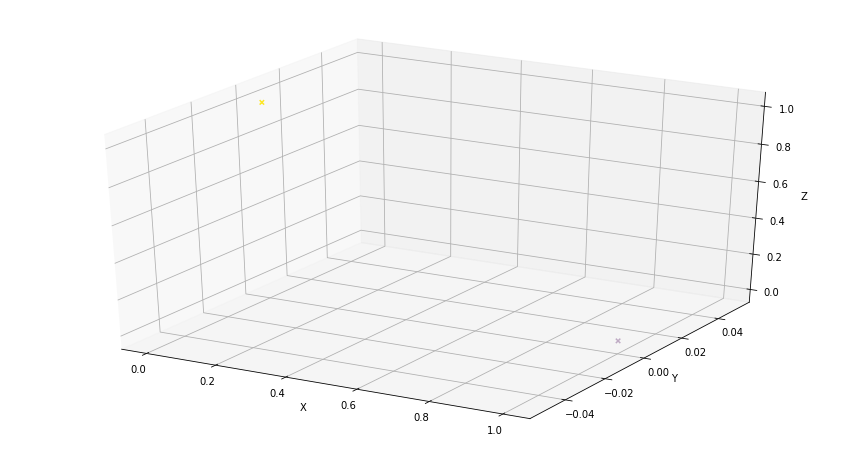

In [89]:
p_no_rot = np.array([[1, 0, 0]])
p_rot = np.zeros(p_no_rot.shape)
for c, p in enumerate(p_no_rot):
    p_rot[c] = np.matmul(R, p)
print(p_rot)
plot_points([p_no_rot, p_rot])

In [82]:
print(p1.shape)
print(p_rot.shape)

(5, 3)
(1, 3)
